In [43]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

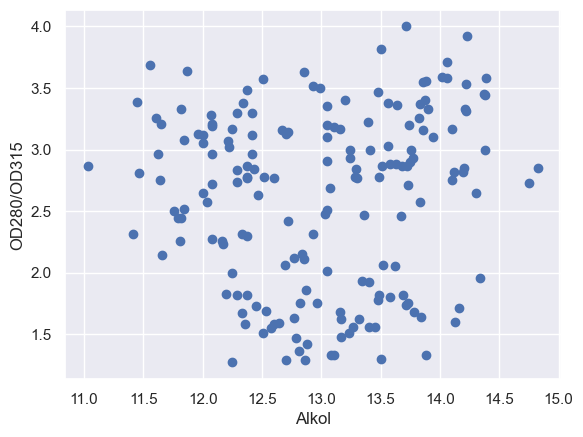

In [44]:
from sklearn.cluster import KMeans
# veriyi al
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']


wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_data['Class']=wine_data['Class']-1
data = pd.DataFrame(wine_data)
x=data[['Alcohol','OD280/OD315']]
# iki değişkenin saçılım grafiğini oluştur
plt.scatter(x['Alcohol'],x['OD280/OD315'])
# eksenleri isimlendir
plt.xlabel('Alkol')
plt.ylabel('OD280/OD315')
plt.show()

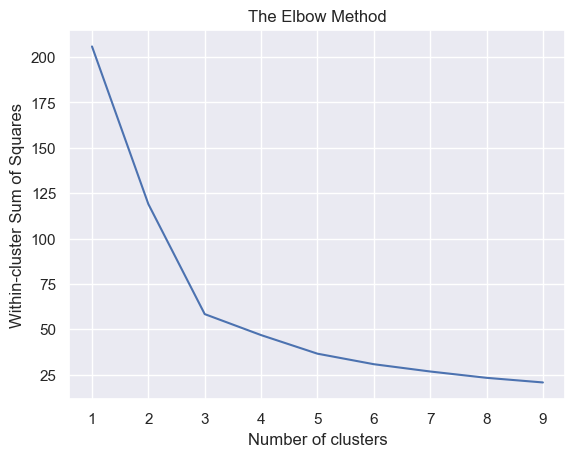

In [45]:
wcss = []
# 'cl_num', WCSS yöntemini kullanmak istediğimiz en fazla kümeyi izleyen bir dizidir. 10'a ayarladık.İstediğimiz değeri girebiliriz.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(n_clusters=i, n_init=10)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

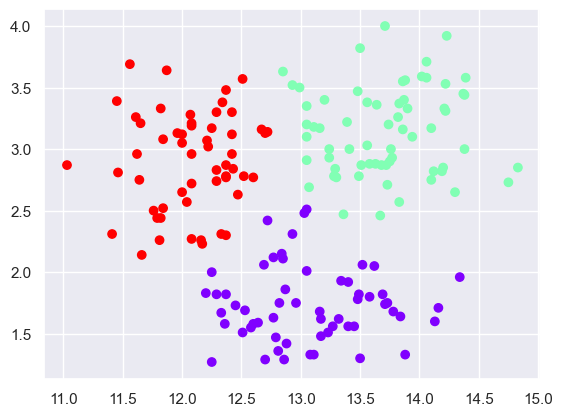

In [46]:
# k'yi 3 olarak seçtik 
kmeans_3 = KMeans(n_clusters=3, random_state=50, n_init=10)
kmeans_3.fit(x)

# girdi verisinin kopyasını yarattık
clusters_3 = x.copy()

# Öngörülen kümeleri not ettik
clusters_3['cluster_pred']=kmeans_3.fit_predict(x)

# Verileri çiz
# c (renk) bir değişkenle kodlanabilen bir bağımsız değişkendir
# Bizim durumumuzda değişken, plt.scatter'a üç renk olduğunu gösteren 0,1,2 değerlerine sahiptir
# Küme 0, 1 ve 2'deki tüm noktalar aynı renk
# cmap renk haritasıdır.rainbow'u seçtik 
plt.scatter(clusters_3['Alcohol'], clusters_3['OD280/OD315'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.show()

In [47]:
# doğruluğu hesaplayacağımız veri çerçevesini oluşturmak
dogruluk = data[['Class', 'Alcohol', 'OD280/OD315']]

# veri çerçevemize tahinleri yeni bir kolon olarak ekledik
dogruluk['tahmin']=clusters_3['cluster_pred']

# tahminle orjinal veri setindeki sınıf aynı olup olmadığını karşılaştıran yeni bir mantıksal kolon ekledik
dogruluk['aynimi']=dogruluk['tahmin']==dogruluk['Class']

# başarı sayısını ve oranını yazdır
print(dogruluk['aynimi'].value_counts())
print(dogruluk['aynimi'].value_counts('%'))
print(clusters_3['cluster_pred'].head())
print(data['Class'].head())

False    171
True       7
Name: aynimi, dtype: int64
False    0.960674
True     0.039326
Name: aynimi, dtype: float64
0    1
1    1
2    1
3    1
4    1
Name: cluster_pred, dtype: int32
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
